## Imports

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import time
from numba import njit
from pyccel.epyccel import epyccel
from pyccel.decorators import types

## Pure python function

In [11]:
def solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu):
    k=nu*dt/(dx*dx)
    for it in range(nt):
        for i in range(nx): un[i] = u[i]
        for i in range(1,nx-1):            
                u[i] = un[i]+k*(un[i+1]-2*un[i]+un[i-1]) 
        u[nx-1]=u[nx-2]
        
    return 0

## Numba accelerator

In [12]:
#add the numba decorator to accelerate code
@njit(fastmath=True)
def solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu):
    
    for it in range(nt):
        for i in range(nx): un[i] = u[i]
        for i in range(1,nx-1):            
                u[i] = un[i]+(nu*dt/(dx*dx))*(un[i+1]-2*un[i]+un[i-1]) 
        u[nx-1]=u[nx-2]
    
   
    return 0

## Pyccel accelerator

In [13]:
#add the pyccel decorator to accelerate code
@types('float[:]', 'float[:]', 'int', 'int', 'float','float', 'float')

def solve_1d_diff_pyccel(u, un, nt, nx, dt, dx, nu):
    
    for it in range(nt):
        for i in range(nx): un[i] = u[i]
        for i in range(1,nx-1):            
                u[i] = un[i]+(nu*dt/(dx*dx))*(un[i+1]-2*un[i]+un[i-1]) 
        u[nx-1]=u[nx-2]    
    
    return 0

## Inputs

Text(0.5, 1.0, '1D Diffusion')

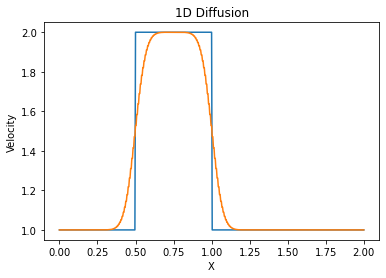

In [14]:
nx = 501
dx = 2 / (nx - 1)
nt = 200    #the number of timesteps we want to calculate
nu = 0.3   #the value of viscosity
CFL = .5 #sigma is a parameter, we'll learn more about it later
dt = CFL * dx**2 / nu #dt is defined using sigma ... more later!
grid = np.linspace(0,2,nx) # creating the space grid

u0 = np.ones(nx)      #a numpy array with nx elements all equal to 1.
u0[int(.5 / dx):int(1 / dx + 1)] = 2  #setting u = 2 between 0.5 and 1 as per our I.C.s
plt.plot(grid,u0);
u = u0.copy()
un = np.ones(nx) #our placeholder array, un, to advance the solution in time

solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)
#Plotting data
plt.plot(grid,u);
#plt.ylim([1.,2.2])
plt.xlabel('X')
plt.ylabel('Velocity')    
plt.title('1D Diffusion') 


## Call Funtions

### Pure function

In [19]:
%timeit solve_1d_diff_pure(u, un, nt, nx, dt, dx, nu)

153 ms ± 7.27 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Function with numba accelerator

In [20]:
%timeit solve_1d_diff_numba(u, un, nt, nx, dt, dx, nu)

35.6 µs ± 2.69 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Function with pyccel accelerator

In [21]:
solve_1d_diff_f90 = epyccel(solve_1d_diff_pyccel)

In [22]:
%timeit solve_1d_diff_f90(u, un, nt, nx, dt, dx, nu)

78.2 µs ± 2.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
